In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from bokeh.plotting import figure, show
import tensorflow as tf
import time 
from datetime import timedelta
import os
os.chdir(path=r'C:\Users\LenovoE73\Desktop\alparslan_hoca')
#import FinanceLab as finlab
import scipy 
import statistics as stat 
import stockstats
import researchpy as rp
%matplotlib inline
from matplotlib import style
style.use('ggplot')
from pandas.api.types import CategoricalDtype
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import f1_score
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
#import FinanceLab as finlab

import statsmodels.api as sm
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from warnings import filterwarnings
filterwarnings('ignore')



# Data Analaysis

# Veri Matched

In [37]:
xl = pd.ExcelFile("Veri-Matched.xlsx")
Veri_Matched = xl.parse("Full")
Veri_Matched_copy = Veri_Matched.copy()
df_temiz_matched = Veri_Matched_copy.drop(columns=['Firm', 'Year', 'AO'])

In [38]:
len(df_temiz_matched)

234

In [39]:
Veri_Matched_copy.columns

Index(['Firm', 'Year', 'AO', 'L1', 'L2', 'L3', 'L4', 'L5', 'S1', 'S2', 'S3',
       'S4', 'S5', 'S6', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'P1', 'P2', 'P3',
       'P4', 'SIZE', 'BIG4'],
      dtype='object')

In [40]:
df_temiz_matched.describe().T

,count,mean,std,min,25%,50%,75%,max
L1,234.0,1.760486,1.972421,0.031697,0.772480,1.233067,1.913257,16.613240
L2,234.0,1.322621,1.785047,0.030212,0.444805,0.801980,1.398932,16.042763
L3,234.0,0.432721,1.443125,0.000019,0.008787,0.054378,0.302473,15.436918
L4,234.0,0.137560,0.524308,-2.793873,-0.030201,0.070486,0.199056,4.046311
L5,234.0,0.062241,0.553280,-2.326496,-0.095751,0.093901,0.289778,5.536457
S1,234.0,0.764015,1.204748,0.045995,0.374024,0.647816,0.792117,17.087913
S2,234.0,2.234478,7.130100,-26.253766,0.393125,1.097237,2.610781,57.717075
S3,234.0,0.228780,0.491142,0.001127,0.049851,0.110995,0.235349,6.471839
S4,234.0,0.475475,2.485714,-10.052762,0.046005,0.174498,0.598221,15.942091
S5,234.0,3.162193,7.087942,-25.253766,1.387820,2.088381,3.581245,58.717075


###########################################################################################################################

# Feature Selection

# penalty function

In [41]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [57]:
#  %%time
#  run_randomForest(X_train_mi, X_test_mi, y_train, y_test);

In [58]:
#  %%time
#  run_randomForest(X_train, X_test, y_train, y_test)

# import library

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_boston
from numpy import array 

# Define dataset

In [42]:
y = Veri_Matched_copy["AO"]
X = df_temiz_matched
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

# cross valitaion Test 

In [369]:
scores = cross_val_score(rf_model, X, y, cv=10, scoring='accuracy')

In [370]:
print("scores : ", scores)

scores :  [0.75       1.         0.70833333 0.95833333 0.73913043 0.95652174
 0.91304348 0.82608696 0.91304348 0.91304348]


In [371]:
print("scores mean: ", scores.mean())

scores mean:  0.8677536231884059


In [375]:
scores_feature_rf = cross_val_score(rf_model_rf, X[features_random_forrest], y, cv=10, scoring='accuracy')

In [376]:
print("scores_feature_rf : ", scores_feature_rf)

scores_feature_rf :  [0.75       1.         0.625      0.91666667 0.73913043 1.
 0.95652174 0.91304348 0.82608696 1.        ]


In [377]:
print("scores_feature_rf mean: ", scores_feature_rf.mean())

scores_feature_rf mean:  0.872644927536232


In [394]:
scores_feature_adaboost = cross_val_score(rf_model_adaboost, X[features_adaboost], y, cv=10, scoring='accuracy')
print("scores_feature_adaboost mean: ", scores_feature_adaboost.mean())

scores_feature_adaboost mean:  0.8894927536231882


# Random Forrest

In [43]:
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
sel.fit(X_train, y_train)
len(sel.get_support())

23

In [44]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

187
47
187
47


In [45]:
%%time
run_randomForest(X_train[X_train.columns[sel.get_support()]], X_test[X_test.columns[sel.get_support()]], y_train, y_test);

Accuracy on test set: 
0.9361702127659575
Wall time: 778 ms


In [46]:
features_random_forrest =X_train.columns[sel.get_support()]
features_random_forrest

Index(['L1', 'L2', 'L3', 'L5', 'S6', 'T5', 'P1', 'P2', 'P4'], dtype='object')

In [49]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [50]:
mi = mutual_info_classif(y_train[features_random_forrest], y_train)

NameError: name 'X_train_grouped_uncorr' is not defined

In [53]:
y_train

117    0
155    0
148    0
158    0
231    1
162    0
218    0
108    1
97     1
168    1
73     1
38     0
104    1
172    0
171    1
111    1
221    0
67     0
217    0
113    0
68     0
75     0
29     0
114    0
126    1
79     1
5      0
56     0
120    0
141    0
      ..
226    0
187    0
191    0
129    0
37     1
157    0
219    0
1      0
52     1
149    0
130    0
151    0
103    1
99     1
116    0
87     1
202    0
74     1
214    1
210    1
121    0
233    0
20     0
188    0
71     1
106    1
14     1
92     1
179    0
102    0
Name: AO, Length: 187, dtype: int64

# AdaBoostRegressor

In [221]:
estimator = AdaBoostRegressor(random_state=0, n_estimators=50)
selector = SelectFromModel(estimator)
selector = selector.fit(X_train, y_train)

In [150]:
X_train.columns[selector.get_support()]

Index(['L2', 'L4', 'S4', 'T1', 'T5', 'P4', 'SIZE'], dtype='object')

In [151]:
%%time
run_randomForest(X_train[X_train.columns[selector.get_support()]], X_test[X_test.columns[selector.get_support()]], y_train, y_test);

Accuracy on test set: 
0.9574468085106383
Wall time: 550 ms


In [152]:
features_adaboost = X_train.columns[selector.get_support()]
features_adaboost

Index(['L2', 'L4', 'S4', 'T1', 'T5', 'P4', 'SIZE'], dtype='object')

# GBM estimator

In [222]:
from sklearn.ensemble import GradientBoostingClassifier as GBM

In [223]:
estimator = GBM(n_estimators=100, random_state=0),
selector_gbm = SelectFromModel(GradientBoostingClassifier()).fit(X_train, y_train)



In [224]:
selector_gbm.get_support()

array([False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False])

In [225]:
%%time
run_randomForest(X_train[X_train.columns[selector_gbm.get_support()]], X_test[X_test.columns[selector_gbm.get_support()]], y_train, y_test);

Accuracy on test set: 
0.8936170212765957
Wall time: 549 ms


In [237]:
'L2', 'L3', 'T5', 'P4'features_gbm = X_train.columns[selector_gbm.get_support()]
features_gbm

Index(['L2', 'L3', 'T5', 'P4'], dtype='object')

# Cart estimator

In [227]:
from sklearn.tree import DecisionTreeClassifier as cart# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeRegressor


In [228]:
cart = DecisionTreeClassifier(criterion="entropy", max_depth=3)
estimator = cart.fit(X_train,y_train)
selector_cart = SelectFromModel(estimator)
selector_cart = selector_cart.fit(X_train,y_train)


In [229]:
selector_cart.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True,  True,  True])

In [230]:
%%time
run_randomForest(X_train[X_train.columns[selector_cart.get_support()]], X_test[X_test.columns[selector_cart.get_support()]], y_train, y_test);

Accuracy on test set: 
0.9148936170212766
Wall time: 556 ms


In [231]:
features_cart = X_train.columns[selector_cart.get_support()]
features_cart

Index(['L1', 'L2', 'T5', 'P4', 'SIZE', 'BIG4'], dtype='object')

################################################################################################################


# Algoritmalar

# 1. KNN 

In [163]:
y = Veri_Matched_copy["AO"]
X = df_temiz_matched
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [164]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_test = np.nan_to_num(y_test)

# scores

In [416]:
scores = ['accuracy','f1','recall','precision']

# cross validation

In [395]:
knn_model = KNeighborsClassifier()
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [401]:
print(cross_val_score(knn_model,X,y,cv=10 , scoring='accuracy'))
print("----")
result_knn_accuracy = cross_val_score(knn_model,X,y,cv=10, scoring='accuracy').mean()
print(result_knn_accuracy)

[0.58333333 0.79166667 0.66666667 0.91666667 0.86956522 0.73913043
 0.82608696 0.73913043 0.7826087  0.91304348]
----
0.7827898550724637


In [402]:
print(cross_val_score(knn_model,X,y,cv=10 , scoring='f1'))
print("----")
result_knn_f1 = cross_val_score(knn_model,X,y,cv=10, scoring='f1').mean()
print(result_knn_f1)

[0.54545455 0.76190476 0.6        0.9        0.82352941 0.57142857
 0.77777778 0.75       0.7826087  0.88888889]
----
0.7401592652871425


In [404]:
print(cross_val_score(knn_model,X,y,cv=10 , scoring='recall'))
print("----")
result_knn_recall = cross_val_score(knn_model,X,y,cv=10, scoring='recall').mean()
print(result_knn_recall)

[0.6        0.8        0.6        0.9        0.77777778 0.4
 0.7        0.9        0.9        0.8       ]
----
0.7377777777777778


In [405]:
print(cross_val_score(knn_model,X,y,cv=10 , scoring='precision'))
print("----")
result_knn_precision = cross_val_score(knn_model,X,y,cv=10, scoring='precision').mean()
print(result_knn_precision)

[0.5        0.72727273 0.6        0.9        0.875      1.
 0.875      0.64285714 0.69230769 1.        ]
----
0.7812437562437563


# 1. KNN feature selection

1- RF features ################################################################

In [411]:
knn_model = KNeighborsClassifier()
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [425]:
features_adaboost

['accuracy', 'f1', 'recall', 'precision']

In [427]:
#Accuracy

print("accuracy list : ", cross_val_score(knn_model,X[features_random_forrest],y,cv=10 , scoring=scores[0]))
result_knn_feature_rf_accuracy = cross_val_score(knn_model,X[features_random_forrest],y,cv=10, scoring=scores[0]).mean()
print("result_knn_feature_rf_accuracy :" , result_knn_feature_rf_accuracy)
print("----")

# F1

print("F1 list : ", cross_val_score(knn_model,X[features_random_forrest],y,cv=10 , scoring=scores[1]))
result_knn_feature_rf_f1 = cross_val_score(knn_model,X[features_random_forrest],y,cv=10, scoring=scores[1]).mean()
print("result_knn_feature_rf_f1 :", result_knn_feature_rf_f1)
print("----")

# recall

print("recall list : ", cross_val_score(knn_model,X[features_random_forrest],y,cv=10 , scoring=scores[2]))
result_knn_feature_rf_recall = cross_val_score(knn_model,X[features_random_forrest],y,cv=10, scoring=scores[2]).mean()
print("result_knn_feature_rf_recall :", result_knn_feature_rf_recall)
print("----")

# precision

print("precision list : ", cross_val_score(knn_model,X[features_random_forrest],y,cv=10 , scoring=scores[3]))
result_knn_feature_rf_precision = cross_val_score(knn_model,X[features_random_forrest],y,cv=10, scoring=scores[3]).mean()
print("result_knn_feature_rf_precision :", result_knn_feature_rf_precision)
print("----")

accuracy list :  [0.58333333 0.91666667 0.83333333 0.91666667 0.86956522 0.82608696
 0.82608696 0.82608696 0.82608696 0.82608696]
result_knn_feature_rf_accuracy : 0.825
----
F1 list :  [0.5        0.9        0.8        0.9        0.84210526 0.75
 0.77777778 0.83333333 0.75       0.75      ]
result_knn_feature_rf_f1 : 0.7803216374269006
----
recall list :  [0.5        0.9        0.8        0.9        0.88888889 0.6
 0.7        1.         0.6        0.6       ]
result_knn_feature_rf_recall : 0.7488888888888889
----
precision list :  [0.5        0.9        0.8        0.9        0.8        1.
 0.875      0.71428571 1.         1.        ]
result_knn_feature_rf_precision : 0.8489285714285714
----


2- Adaboost Features ################################################################

In [429]:
knn = KNeighborsClassifier()
knn_model_adaboost_feature = knn.fit(X_train[features_adaboost], y_train)
knn_model_adaboost_feature

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [430]:
#Accuracy

print("accuracy list : ", cross_val_score(knn_model_adaboost_feature,X[features_adaboost],y,cv=10 , scoring=scores[0]))
result_knn_feature_adaboost_accuracy = cross_val_score(knn_model_adaboost_feature,X[features_adaboost],y,cv=10, scoring=scores[0]).mean()
print("result_knn_feature_adaboost_accuracy :" , result_knn_feature_adaboost_accuracy)
print("----")

# F1

print("F1 list : ", cross_val_score(knn_model_adaboost_feature,X[features_adaboost],y,cv=10 , scoring=scores[1]))
result_knn_feature_adaboost_f1 = cross_val_score(knn_model_adaboost_feature,X[features_adaboost],y,cv=10, scoring=scores[1]).mean()
print("result_knn_feature_adaboost_f1 :", result_knn_feature_adaboost_f1)
print("----")

# recall

print("recall list : ", cross_val_score(knn_model_adaboost_feature,X[features_adaboost],y,cv=10 , scoring=scores[2]))
result_knn_feature_adaboost_recall = cross_val_score(knn_model_adaboost_feature,X[features_adaboost],y,cv=10, scoring=scores[2]).mean()
print("result_knn_feature_adaboost_recall :", result_knn_feature_adaboost_recall)
print("----")

# precision

print("precision list : ", cross_val_score(knn_model_adaboost_feature,X[features_adaboost],y,cv=10 , scoring=scores[3]))
result_knn_feature_adaboost_precision = cross_val_score(knn_model_adaboost_feature,X[features_adaboost],y,cv=10, scoring=scores[3]).mean()
print("result_knn_feature_adaboost_precision :", result_knn_feature_adaboost_precision)
print("----")


accuracy list :  [0.58333333 0.79166667 0.875      0.91666667 0.65217391 0.82608696
 0.82608696 0.73913043 0.60869565 0.82608696]
result_knn_feature_adaboost_accuracy : 0.7644927536231884
----
F1 list :  [0.5        0.76190476 0.85714286 0.9        0.42857143 0.75
 0.8        0.75       0.52631579 0.75      ]
result_knn_feature_adaboost_f1 : 0.7023934837092731
----
recall list :  [0.5        0.8        0.9        0.9        0.33333333 0.6
 0.8        0.9        0.5        0.6       ]
result_knn_feature_adaboost_recall : 0.6833333333333333
----
precision list :  [0.5        0.72727273 0.81818182 0.9        0.6        1.
 0.8        0.64285714 0.55555556 1.        ]
result_knn_feature_adaboost_precision : 0.7543867243867244
----


3- GBM Features ################################################################

In [432]:
knn = KNeighborsClassifier()
knn_model_gbm_feature = knn.fit(X_train[features_gbm], y_train)
knn_model_gbm_feature

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [433]:
#Accuracy

print("accuracy list : ", cross_val_score(knn_model_gbm_feature,X[features_gbm],y,cv=10 , scoring=scores[0]))
result_knn_feature_gbm_accuracy = cross_val_score(knn_model_gbm_feature,X[features_gbm],y,cv=10, scoring=scores[0]).mean()
print("result_knn_feature_gbm_accuracy :" , result_knn_feature_gbm_accuracy)
print("----")

# F1

print("F1 list : ", cross_val_score(knn_model_gbm_feature,X[features_gbm],y,cv=10 , scoring=scores[1]))
result_knn_feature_gbm_f1 = cross_val_score(knn_model_gbm_feature,X[features_gbm],y,cv=10, scoring=scores[1]).mean()
print("result_knn_feature_gbm_f1 :", result_knn_feature_gbm_f1)
print("----")

# recall

print("recall list : ", cross_val_score(knn_model_gbm_feature,X[features_gbm],y,cv=10 , scoring=scores[2]))
result_knn_feature_gbm_recall = cross_val_score(knn_model_gbm_feature,X[features_gbm],y,cv=10, scoring=scores[2]).mean()
print("result_knn_feature_gbm_recall :", result_knn_feature_gbm_recall)
print("----")

# precision

print("precision list : ", cross_val_score(knn_model_gbm_feature,X[features_gbm],y,cv=10 , scoring=scores[3]))
result_knn_feature_gbm_precision = cross_val_score(knn_model_gbm_feature,X[features_gbm],y,cv=10, scoring=scores[3]).mean()
print("result_knn_feature_gbm_precision :", result_knn_feature_gbm_precision)
print("----")



accuracy list :  [0.625      0.91666667 0.75       0.91666667 0.7826087  0.86956522
 0.7826087  0.86956522 0.82608696 0.86956522]
result_knn_feature_gbm_accuracy : 0.8208333333333332
----
F1 list :  [0.57142857 0.9        0.7        0.9        0.76190476 0.82352941
 0.70588235 0.86956522 0.75       0.82352941]
result_knn_feature_gbm_f1 : 0.7805839727195225
----
recall list :  [0.6        0.9        0.7        0.9        0.88888889 0.7
 0.6        1.         0.6        0.7       ]
result_knn_feature_gbm_recall : 0.758888888888889
----
precision list :  [0.54545455 0.9        0.7        0.9        0.66666667 1.
 0.85714286 0.76923077 1.         1.        ]
result_knn_feature_gbm_precision : 0.8338494838494839
----


4- cart Features ################################################################

In [239]:
knn = KNeighborsClassifier()
knn_model_cart_feature = knn.fit(X_train[features_cart], y_train)
knn_model_cart_feature

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [434]:
#Accuracy

print("accuracy list : ", cross_val_score(knn_model_cart_feature,X[features_cart],y,cv=10 , scoring=scores[0]))
result_knn_feature_cart_accuracy = cross_val_score(knn_model_cart_feature,X[features_cart],y,cv=10, scoring=scores[0]).mean()
print("result_knn_feature_cart_accuracy :" , result_knn_feature_cart_accuracy)
print("----")

# F1

print("F1 list : ", cross_val_score(knn_model_cart_feature,X[features_cart],y,cv=10 , scoring=scores[1]))
result_knn_feature_cart_f1 = cross_val_score(knn_model_cart_feature,X[features_cart],y,cv=10, scoring=scores[1]).mean()
print("result_knn_feature_cart_f1 :", result_knn_feature_cart_f1)
print("----")

# recall

print("recall list : ", cross_val_score(knn_model_cart_feature,X[features_cart],y,cv=10 , scoring=scores[2]))
result_knn_feature_cart_recall = cross_val_score(knn_model_cart_feature,X[features_cart],y,cv=10, scoring=scores[2]).mean()
print("result_knn_feature_cart_recall :", result_knn_feature_cart_recall)
print("----")

# precision

print("precision list : ", cross_val_score(knn_model_cart_feature,X[features_cart],y,cv=10 , scoring=scores[3]))
result_knn_feature_cart_precision = cross_val_score(knn_model_cart_feature,X[features_cart],y,cv=10, scoring=scores[3]).mean()
print("result_knn_feature_cart_precision :", result_knn_feature_cart_precision)
print("----")



accuracy list :  [0.625      0.91666667 0.75       0.91666667 0.82608696 0.86956522
 0.73913043 0.86956522 0.7826087  0.91304348]
result_knn_feature_cart_accuracy : 0.8208333333333332
----
F1 list :  [0.57142857 0.9        0.66666667 0.90909091 0.8        0.82352941
 0.625      0.86956522 0.66666667 0.88888889]
result_knn_feature_cart_f1 : 0.7720836331897714
----
recall list :  [0.6        0.9        0.6        1.         0.88888889 0.7
 0.5        1.         0.5        0.8       ]
result_knn_feature_cart_recall : 0.7488888888888888
----
precision list :  [0.54545455 0.9        0.75       0.83333333 0.72727273 1.
 0.83333333 0.76923077 1.         1.        ]
result_knn_feature_cart_precision : 0.8358624708624708
----


# 2.Yapay Sinir Ağları (MLP)

In [435]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [436]:
scaler = StandardScaler()

In [439]:
scaler.fit(X_train) # ölçeklendirilme işlemi
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [440]:
y_train = np.nan_to_num(y_train)
mlpc = MLPClassifier().fit(X, y)

In [442]:
#Accuracy

print("accuracy list : ",cross_val_score(mlpc,X,y,cv=10, scoring=scores[0]))
result_mlp_accuracy = cross_val_score(mlpc,X,y,cv=10, scoring=scores[0]).mean()
print("result_mlp_accuracy :" , result_mlp_accuracy)
print("----")

# F1

print("F1 list : ",cross_val_score(mlpc,X,y,cv=10, scoring=scores[1]))
result_mlp_f1 = cross_val_score(mlpc,X,y,cv=10, scoring=scores[1]).mean()
print("result_mlp_f1 :" , result_mlp_f1)
print("----")

# recall

print("recall list : ",cross_val_score(mlpc,X,y,cv=10, scoring=scores[2]))
result_mlp_recall = cross_val_score(mlpc,X,y,cv=10, scoring=scores[2]).mean()
print("result_mlp_recall:" , result_mlp_recall)
print("----")

# precision

print("precision list : ",cross_val_score(mlpc,X,y,cv=10, scoring=scores[3]))
result_mlp_precision = cross_val_score(mlpc,X,y,cv=10, scoring=scores[3]).mean()
print("result_mlp_precision :" , result_mlp_precision)
print("----")

accuracy list :  [0.75       0.70833333 0.83333333 0.91666667 0.69565217 0.86956522
 0.91304348 0.7826087  0.73913043 0.82608696]
result_mlp_accuracy : 0.8336956521739131
----
F1 list :  [0.63636364 0.85714286 0.8        0.95238095 0.66666667 0.82352941
 0.84210526 0.75       0.85714286 0.75      ]
result_mlp_f1 : 0.8053485429259423
----
recall list :  [0.7        1.         0.7        0.8        0.44444444 0.6
 0.6        1.         0.9        0.7       ]
result_mlp_recall: 0.85
----
precision list :  [0.61538462 1.         0.63636364 0.90909091 1.         1.
 0.88888889 0.69230769 0.8        1.        ]
result_mlp_precision : 0.8448917748917749
----


# 2.Yapay Sinir Ağları (MLP) feature selection

1- RF features ################################################################

In [443]:
y_train = np.nan_to_num(y_train)
mlpc = MLPClassifier().fit(X, y)

In [444]:
#Accuracy

print("accuracy list : ",cross_val_score(mlpc,X[features_random_forrest],y,cv=10, scoring=scores[0]))
result_mlp_feature_rf_accuracy = cross_val_score(mlpc,X[features_random_forrest],y,cv=10, scoring=scores[0]).mean()
print("result_mlp_feature_rf_accuracy :" , result_mlp_feature_rf_accuracy)
print("----")

# F1

print("F1 list : ",cross_val_score(mlpc,X[features_random_forrest],y,cv=10, scoring=scores[1]))
result_mlp_feature_rf_f1 = cross_val_score(mlpc,X[features_random_forrest],y,cv=10, scoring=scores[1]).mean()
print("result_mlp_feature_rf_f1 :" , result_mlp_feature_rf_f1)
print("----")

# recall

print("recall list : ",cross_val_score(mlpc,X[features_random_forrest],y,cv=10, scoring=scores[2]))
result_mlp_feature_rf_recall = cross_val_score(mlpc,X[features_random_forrest],y,cv=10, scoring=scores[2]).mean()
print("result_mlp_feature_rf_recall:" , result_mlp_feature_rf_recall)
print("----")

# precision

print("precision list : ",cross_val_score(mlpc,X[features_random_forrest],y,cv=10, scoring=scores[3]))
result_mlp_feature_rf_precision = cross_val_score(mlpc,X[features_random_forrest],y,cv=10, scoring=scores[3]).mean()
print("result_mlp_feature_rf_precision :" , result_mlp_feature_rf_precision)
print("----")

accuracy list :  [0.66666667 1.         0.79166667 0.95833333 0.7826087  0.86956522
 0.86956522 0.86956522 0.86956522 0.86956522]
result_mlp_feature_rf_accuracy : 0.8547101449275363
----
F1 list :  [0.69565217 1.         0.76190476 0.9        0.77777778 0.75
 0.84210526 0.86956522 0.82352941 0.82352941]
result_mlp_feature_rf_f1 : 0.8423808669157976
----
recall list :  [0.6        1.         0.8        1.         0.77777778 0.6
 0.8        1.         0.7        0.7       ]
result_mlp_feature_rf_recall: 0.8155555555555555
----
precision list :  [0.61538462 1.         0.8        0.90909091 0.75       1.
 0.88888889 0.76923077 1.         1.        ]
result_mlp_feature_rf_precision : 0.8732595182595183
----


2- Adaboost Features ################################################################


In [445]:
#Accuracy

print("accuracy list : ",cross_val_score(mlpc,X[features_adaboost],y,cv=10, scoring=scores[0]))
result_mlp_feature_adaboost_accuracy = cross_val_score(mlpc,X[features_adaboost],y,cv=10, scoring=scores[0]).mean()
print("result_mlp_feature_adaboost_accuracy :" , result_mlp_feature_adaboost_accuracy)
print("----")

# F1

print("F1 list : ",cross_val_score(mlpc,X[features_adaboost],y,cv=10, scoring=scores[1]))
result_mlp_feature_adaboost_f1 = cross_val_score(mlpc,X[features_adaboost],y,cv=10, scoring=scores[1]).mean()
print("result_mlp_feature_adaboost_f1 :" , result_mlp_feature_adaboost_f1)
print("----")

# recall

print("recall list : ",cross_val_score(mlpc,X[features_adaboost],y,cv=10, scoring=scores[2]))
result_mlp_feature_adaboost_recall = cross_val_score(mlpc,X[features_adaboost],y,cv=10, scoring=scores[2]).mean()
print("result_mlp_feature_adaboost_recall:" , result_mlp_feature_adaboost_recall)
print("----")

# precision

print("precision list : ",cross_val_score(mlpc,X[features_adaboost],y,cv=10, scoring=scores[3]))
result_mlp_feature_adaboost_precision = cross_val_score(mlpc,X[features_adaboost],y,cv=10, scoring=scores[3]).mean()
print("result_mlp_feature_adaboost_precision :" , result_mlp_feature_adaboost_precision)
print("----")

accuracy list :  [0.70833333 0.91666667 0.70833333 0.95833333 0.86956522 0.91304348
 0.82608696 0.86956522 0.7826087  0.86956522]
result_mlp_feature_adaboost_accuracy : 0.8423913043478259
----
F1 list :  [0.63636364 0.9        0.58823529 0.95238095 0.85714286 0.94736842
 0.70588235 0.85714286 0.6        0.75      ]
result_mlp_feature_adaboost_f1 : 0.7681495618842502
----
recall list :  [0.6 0.9 0.5 1.  1.  0.7 0.6 0.9 0.9 0.6]
result_mlp_feature_adaboost_recall: 0.7677777777777778
----
precision list :  [0.6        0.9        0.71428571 0.90909091 0.85714286 1.
 0.85714286 0.81818182 0.66666667 1.        ]
result_mlp_feature_adaboost_precision : 0.8056204906204908
----


3- GBM Features ################################################################

In [446]:
#Accuracy

print("accuracy list : ",cross_val_score(mlpc,X[features_gbm],y,cv=10, scoring=scores[0]))
result_mlp_feature_gbm_accuracy = cross_val_score(mlpc,X[features_gbm],y,cv=10, scoring=scores[0]).mean()
print("result_mlp_feature_gbm_accuracy :" , result_mlp_feature_gbm_accuracy)
print("----")

# F1

print("F1 list : ",cross_val_score(mlpc,X[features_gbm],y,cv=10, scoring=scores[1]))
result_mlp_feature_gbm_f1 = cross_val_score(mlpc,X[features_gbm],y,cv=10, scoring=scores[1]).mean()
print("result_mlp_feature_gbm_f1 :" , result_mlp_feature_gbm_f1)
print("----")

# recall

print("recall list : ",cross_val_score(mlpc,X[features_gbm],y,cv=10, scoring=scores[2]))
result_mlp_feature_gbm_recall = cross_val_score(mlpc,X[features_gbm],y,cv=10, scoring=scores[2]).mean()
print("result_mlp_feature_gbm_recall:" , result_mlp_feature_gbm_recall)
print("----")

# precision

print("precision list : ",cross_val_score(mlpc,X[features_gbm],y,cv=10, scoring=scores[3]))
result_mlp_feature_gbm_precision = cross_val_score(mlpc,X[features_gbm],y,cv=10, scoring=scores[3]).mean()
print("result_mlp_feature_gbm_precision :" , result_mlp_feature_gbm_precision)
print("----")

accuracy list :  [0.75       0.91666667 0.70833333 0.95833333 0.82608696 1.
 0.86956522 0.86956522 0.86956522 0.86956522]
result_mlp_feature_gbm_accuracy : 0.8548913043478261
----
F1 list :  [0.69565217 0.94736842 0.58823529 0.95238095 0.85714286 1.
 0.84210526 0.86956522 0.77777778 0.82352941]
result_mlp_feature_gbm_f1 : 0.828983488132095
----
recall list :  [0.8 0.9 0.5 1.  1.  0.7 0.8 0.9 0.6 0.8]
result_mlp_feature_gbm_recall: 0.8300000000000001
----
precision list :  [0.6        0.90909091 0.71428571 0.90909091 0.75       1.
 0.9        0.71428571 0.88888889 1.        ]
result_mlp_feature_gbm_precision : 0.8648629148629148
----


4- cart Features ################################################################

In [447]:
#Accuracy

print("accuracy list : ",cross_val_score(mlpc,X[features_cart],y,cv=10, scoring=scores[0]))
result_mlp_feature_cart_accuracy = cross_val_score(mlpc,X[features_cart],y,cv=10, scoring=scores[0]).mean()
print("result_mlp_feature_cart_accuracy :" , result_mlp_feature_cart_accuracy)
print("----")

# F1

print("F1 list : ",cross_val_score(mlpc,X[features_cart],y,cv=10, scoring=scores[1]))
result_mlp_feature_cart_f1 = cross_val_score(mlpc,X[features_cart],y,cv=10, scoring=scores[1]).mean()
print("result_mlp_feature_cart_f1 :" , result_mlp_feature_cart_f1)
print("----")

# recall

print("recall list : ",cross_val_score(mlpc,X[features_cart],y,cv=10, scoring=scores[2]))
result_mlp_feature_cart_recall = cross_val_score(mlpc,X[features_cart],y,cv=10, scoring=scores[2]).mean()
print("result_mlp_feature_cart_recall:" , result_mlp_feature_cart_recall)
print("----")

# precision

print("precision list : ",cross_val_score(mlpc,X[features_cart],y,cv=10, scoring=scores[3]))
result_mlp_feature_cart_precision = cross_val_score(mlpc,X[features_cart],y,cv=10, scoring=scores[3]).mean()
print("result_mlp_feature_cart_precision :" , result_mlp_feature_cart_precision)
print("----")

accuracy list :  [0.70833333 0.95833333 0.75       0.91666667 0.86956522 0.86956522
 0.73913043 0.82608696 0.95652174 0.95652174]
result_mlp_feature_cart_accuracy : 0.8333333333333333
----
F1 list :  [0.66666667 0.9        0.6        0.90909091 0.9        0.82352941
 0.70588235 0.81818182 0.82352941 0.82352941]
result_mlp_feature_cart_f1 : 0.8072000187634861
----
recall list :  [0.7 1.  0.6 1.  1.  0.6 0.6 0.9 0.7 0.7]
result_mlp_feature_cart_recall: 0.77
----
precision list :  [0.6        0.9        0.85714286 0.9        0.81818182 1.
 0.85714286 0.71428571 1.         1.        ]
result_mlp_feature_cart_precision : 0.8492657342657342
----


# 3.Random Forests (RF)

In [540]:
from sklearn.ensemble import RandomForestClassifier

In [543]:
rf_model = RandomForestClassifier()

In [544]:
#Accuracy

print("accuracy list : ",cross_val_score(rf_model,X,y,cv=10, scoring=scores[0]))
result_rf_accuracy = cross_val_score(rf_model,X,y,cv=10, scoring=scores[0]).mean()
print("result_rf_accuracy :" , result_rf_accuracy)
print("----")

# F1

print("F1 list : ",cross_val_score(rf_model,X,y,cv=10, scoring=scores[1]))
result_rf_f1 = cross_val_score(rf_model,X,y,cv=10, scoring=scores[1]).mean()
print("result_rf_f1 :" , result_rf_f1)
print("----")

# recall

print("recall list : ",cross_val_score(rf_model,X,y,cv=10, scoring=scores[2]))
result_rf_recall = cross_val_score(rf_model,X,y,cv=10, scoring=scores[2]).mean()
print("result_rf_recall:" , result_rf_recall)
print("----")

# precision

print("precision list : ",cross_val_score(rf_model,X,y,cv=10, scoring=scores[3]))
result_rf_precision = cross_val_score(rf_model,X,y,cv=10, scoring=scores[3]).mean()
print("result_rf_precision :" , result_rf_precision)
print("----")

accuracy list :  [0.79166667 1.         0.79166667 0.91666667 0.73913043 0.95652174
 0.91304348 0.86956522 0.91304348 0.91304348]
result_rf_accuracy : 0.8722826086956521
----
F1 list :  [0.72727273 1.         0.69565217 0.95238095 0.57142857 0.94736842
 0.9        0.83333333 0.94736842 0.88888889]
result_rf_f1 : 0.8511468724512203
----
recall list :  [0.8        1.         0.8        1.         0.44444444 0.9
 0.9        1.         0.8        0.8       ]
result_rf_recall: 0.8344444444444445
----
precision list :  [0.66666667 1.         0.66666667 0.9        0.8        1.
 0.9        0.76923077 1.         1.        ]
result_rf_precision : 0.8600543900543901
----


# 3.Random Forests feature selection

1- RF features ################################################################

In [536]:
#Accuracy

print("accuracy list : ",cross_val_score(rf_model,X[features_random_forrest],y,cv=10, scoring=scores[0]))
result_rf_feature_rf_accuracy = cross_val_score(rf_model,X[features_random_forrest],y,cv=10, scoring=scores[0]).mean()
print("result_rf_feature_rf_accuracy :" , result_rf_feature_rf_accuracy)
print("----")

# F1

print("F1 list : ",cross_val_score(rf_model,X[features_random_forrest],y,cv=10, scoring=scores[1]))
result_rf_feature_rf_f1 = cross_val_score(rf_model,X[features_random_forrest],y,cv=10, scoring=scores[1]).mean()
print("result_rf_feature_rf_f1 :" , result_rf_feature_rf_f1)
print("----")

# recall

print("recall list : ",cross_val_score(rf_model,X[features_random_forrest],y,cv=10, scoring=scores[2]))
result_rf_feature_rf_recall = cross_val_score(rf_model,X[features_random_forrest],y,cv=10, scoring=scores[2]).mean()
print("result_rf_feature_rf_recall:" , result_rf_feature_rf_recall)
print("----")

# precision

print("precision list : ",cross_val_score(rf_model,X[features_random_forrest],y,cv=10, scoring=scores[3]))
result_rf_feature_rf_precision = cross_val_score(rf_model,X[features_random_forrest],y,cv=10, scoring=scores[3]).mean()
print("result_rf_feature_rf_precision :" , result_rf_feature_rf_precision)
print("----")

accuracy list :  [0.75       1.         0.66666667 0.91666667 0.73913043 1.
 0.95652174 0.91304348 0.82608696 1.        ]
result_rf_feature_rf_accuracy : 0.8768115942028984
----
F1 list :  [0.72727273 0.95238095 0.63636364 0.9        0.53333333 1.
 0.9        0.90909091 0.77777778 1.        ]
result_rf_feature_rf_f1 : 0.8469302042986253
----
recall list :  [0.8        1.         0.7        0.9        0.44444444 1.
 0.9        1.         0.6        1.        ]
result_rf_feature_rf_recall: 0.8244444444444443
----
precision list :  [0.66666667 1.         0.54545455 0.9        0.8        1.
 1.         0.83333333 0.875      1.        ]
result_rf_feature_rf_precision : 0.8690384615384616
----


2- Adaboost Features ################################################################

In [456]:
#Accuracy

print("accuracy list : ",cross_val_score(rf_model,X[features_adaboost],y,cv=10, scoring=scores[0]))
result_rf_features_adaboost_accuracy = cross_val_score(rf_model,X[features_adaboost],y,cv=10, scoring=scores[0]).mean()
print("result_rf_features_adaboost_accuracy :" , result_rf_features_adaboost_accuracy)
print("----")

# F1

print("F1 list : ",cross_val_score(rf_model,X[features_adaboost],y,cv=10, scoring=scores[1]))
result_rf_features_adaboost_f1 = cross_val_score(rf_model,X[features_adaboost],y,cv=10, scoring=scores[1]).mean()
print("result_rf_features_adaboost_f1 :" , result_rf_features_adaboost_f1)
print("----")

# recall

print("recall list : ",cross_val_score(rf_model,X[features_adaboost],y,cv=10, scoring=scores[2]))
result_rf_features_adaboost_recall = cross_val_score(rf_model,X[features_adaboost],y,cv=10, scoring=scores[2]).mean()
print("result_rf_features_adaboost_recall:" , result_rf_features_adaboost_recall)
print("----")

# precision

print("precision list : ",cross_val_score(rf_model,X[features_adaboost],y,cv=10, scoring=scores[3]))
result_rf_features_adaboost_precision = cross_val_score(rf_model,X[features_adaboost],y,cv=10, scoring=scores[3]).mean()
print("result_rf_features_adaboost_precision :" , result_rf_features_adaboost_precision)
print("----")

accuracy list :  [0.75       1.         0.625      0.91666667 0.73913043 1.
 1.         0.91304348 0.82608696 1.        ]
result_rf_features_adaboost_accuracy : 0.8853260869565217
----
F1 list :  [0.81818182 1.         0.6        0.95238095 0.625      1.
 1.         0.90909091 0.75       1.        ]
result_rf_features_adaboost_f1 : 0.8545995670995671
----
recall list :  [0.8        1.         0.6        0.9        0.55555556 1.
 1.         1.         0.6        1.        ]
result_rf_features_adaboost_recall: 0.8455555555555556
----
precision list :  [0.66666667 1.         0.6        0.9        0.71428571 1.
 1.         0.90909091 1.         1.        ]
result_rf_features_adaboost_precision : 0.8896969696969699
----


3- GBM Features ################################################################

In [461]:
#Accuracy

print("accuracy list : ",cross_val_score(rf_model,X[features_gbm],y,cv=10, scoring=scores[0]))
result_rf_features_gbm_accuracy = cross_val_score(rf_model,X[features_gbm],y,cv=10, scoring=scores[0]).mean()
print("result_rf_features_gbm_accuracy :" , result_rf_features_gbm_accuracy)
print("----")

# F1

print("F1 list : ",cross_val_score(rf_model,X[features_gbm],y,cv=10, scoring=scores[1]))
result_rf_features_gbm_f1 = cross_val_score(rf_model,X[features_gbm],y,cv=10, scoring=scores[1]).mean()
print("result_rf_features_gbm_f1 :" , result_rf_features_gbm_f1)
print("----")

# recall

print("recall list : ",cross_val_score(rf_model,X[features_gbm],y,cv=10, scoring=scores[2]))
result_rf_features_gbm_recall = cross_val_score(rf_model,X[features_gbm],y,cv=10, scoring=scores[2]).mean()
print("result_rf_features_gbm_recall:" , result_rf_features_gbm_recall)
print("----")

# precision

print("precision list : ",cross_val_score(rf_model,X[features_gbm],y,cv=10, scoring=scores[3]))
result_rf_features_gbm_precision = cross_val_score(rf_model,X[features_gbm],y,cv=10, scoring=scores[3]).mean()
print("result_rf_features_gbm_precision :" , result_rf_features_gbm_precision)
print("----")

accuracy list :  [0.875      0.95833333 0.625      0.91666667 0.60869565 1.
 1.         0.86956522 0.73913043 1.        ]
result_rf_features_gbm_accuracy : 0.8509057971014492
----
F1 list :  [0.7826087  0.95238095 0.57142857 0.9        0.5        1.
 1.         0.86956522 0.625      1.        ]
result_rf_features_gbm_f1 : 0.8127898550724637
----
recall list :  [0.9        1.         0.6        0.9        0.33333333 1.
 1.         1.         0.5        1.        ]
result_rf_features_gbm_recall: 0.8133333333333332
----
precision list :  [0.69230769 0.90909091 0.6        0.9        0.5        1.
 1.         0.76923077 0.83333333 1.        ]
result_rf_features_gbm_precision : 0.8178321678321676
----


4- cart Features ################################################################

In [465]:
#Accuracy

print("accuracy list : ",cross_val_score(rf_model,X[features_cart],y,cv=10, scoring=scores[0]))
result_rf_features_cart_accuracy = cross_val_score(rf_model,X[features_cart],y,cv=10, scoring=scores[0]).mean()
print("result_rf_features_cart_accuracy :" , result_rf_features_cart_accuracy)
print("----")

# F1

print("F1 list : ",cross_val_score(rf_model,X[features_cart],y,cv=10, scoring=scores[1]))
result_rf_features_cart_f1 = cross_val_score(rf_model,X[features_cart],y,cv=10, scoring=scores[1]).mean()
print("result_rf_features_cart_f1 :" , result_rf_features_cart_f1)
print("----")

# recall

print("recall list : ",cross_val_score(rf_model,X[features_cart],y,cv=10, scoring=scores[2]))
result_rf_features_cart_recall = cross_val_score(rf_model,X[features_cart],y,cv=10, scoring=scores[2]).mean()
print("result_rf_features_cart_recall:" , result_rf_features_cart_recall)
print("----")

# precision

print("precision list : ",cross_val_score(rf_model,X[features_cart],y,cv=10, scoring=scores[3]))
result_rf_features_cart_precision = cross_val_score(rf_model,X[features_cart],y,cv=10, scoring=scores[3]).mean()
print("result_rf_features_cart_precision :" , result_rf_features_cart_precision)
print("----")

accuracy list :  [0.75       1.         0.625      0.91666667 0.82608696 1.
 0.95652174 0.82608696 0.86956522 1.        ]
result_rf_features_cart_accuracy : 0.8682971014492754
----
F1 list :  [0.72727273 1.         0.57142857 0.9        0.70588235 0.94736842
 0.95238095 0.8        0.82352941 1.        ]
result_rf_features_cart_f1 : 0.8491414141414142
----
recall list :  [0.7        1.         0.6        0.9        0.88888889 0.9
 1.         0.8        0.7        1.        ]
result_rf_features_cart_recall: 0.8588888888888888
----
precision list :  [0.66666667 1.         0.58333333 0.9        0.72727273 1.
 0.90909091 0.8        1.         1.        ]
result_rf_features_cart_precision : 0.8621212121212121
----


# 4.Gradient Boosting Machines

In [466]:
gbm_model = GradientBoostingClassifier()

In [471]:
#Accuracy

print("accuracy list : ",cross_val_score(gbm_model,X,y,cv=10, scoring=scores[0]))
result_gbm_accuracy = cross_val_score(gbm_model,X,y,cv=10, scoring=scores[0]).mean()
print("result_gbm_accuracy :" , result_gbm_accuracy)
print("----")

# F1

print("F1 list : ",cross_val_score(gbm_model,X,y,cv=10, scoring=scores[1]))
result_gbm_f1 = cross_val_score(gbm_model,X,y,cv=10, scoring=scores[1]).mean()
print("result_gbm_f1 :" , result_gbm_f1)
print("----")

# recall

print("recall list : ",cross_val_score(gbm_model,X,y,cv=10, scoring=scores[2]))
result_gbm_recall = cross_val_score(gbm_model,X,y,cv=10, scoring=scores[2]).mean()
print("result_gbm_recall:" , result_gbm_recall)
print("----")

# precision

print("precision list : ",cross_val_score(gbm_model,X,y,cv=10, scoring=scores[3]))
result_gbm_precision = cross_val_score(gbm_model,X,y,cv=10, scoring=scores[3]).mean()
print("result_gbm_precision :" , result_gbm_precision)
print("----")

accuracy list :  [0.70833333 1.         0.66666667 0.91666667 0.73913043 0.95652174
 0.95652174 0.91304348 0.73913043 1.        ]
result_gbm_accuracy : 0.8596014492753623
----
F1 list :  [0.66666667 1.         0.6        0.9        0.57142857 0.94736842
 0.95238095 0.90909091 0.625      1.        ]
result_gbm_f1 : 0.817193552061973
----
recall list :  [0.7        1.         0.6        0.9        0.44444444 0.9
 1.         1.         0.5        1.        ]
result_gbm_recall: 0.8044444444444444
----
precision list :  [0.63636364 1.         0.6        0.9        0.8        1.
 0.90909091 0.83333333 0.83333333 1.        ]
result_gbm_precision : 0.8512121212121212
----


# 4.Gradient Boosting Machines Feature Selection

1- RF features ################################################################

In [472]:
#Accuracy

print("accuracy list : ",cross_val_score(gbm_model,X[features_random_forrest],y,cv=10, scoring=scores[0]))
result_gbm_features_rf__accuracy = cross_val_score(gbm_model,X[features_random_forrest],y,cv=10, scoring=scores[0]).mean()
print("result_gbm_features_rf__accuracy :" , result_gbm_features_rf__accuracy)
print("----")

# F1

print("F1 list : ",cross_val_score(gbm_model,X[features_random_forrest],y,cv=10, scoring=scores[1]))
result_gbm_features_rf__f1 = cross_val_score(gbm_model,X[features_random_forrest],y,cv=10, scoring=scores[1]).mean()
print("result_gbm_features_rf__f1 :" , result_gbm_features_rf__f1)
print("----")

# recall

print("recall list : ",cross_val_score(gbm_model,X[features_random_forrest],y,cv=10, scoring=scores[2]))
result_gbm_features_rf__recall = cross_val_score(gbm_model,X[features_random_forrest],y,cv=10, scoring=scores[2]).mean()
print("result_gbm_features_rf__recall:" , result_gbm_features_rf__recall)
print("----")

# precision

print("precision list : ",cross_val_score(gbm_model,X[features_random_forrest],y,cv=10, scoring=scores[3]))
result_gbm_features_rf__precision = cross_val_score(gbm_model,X[features_random_forrest],y,cv=10, scoring=scores[3]).mean()
print("result_gbm_features_rf__precision :" , result_gbm_features_rf__precision)
print("----")

accuracy list :  [0.75       0.95833333 0.66666667 0.91666667 0.73913043 0.86956522
 0.95652174 0.91304348 0.73913043 1.        ]
result_gbm_features_rf__accuracy : 0.8509057971014492
----
F1 list :  [0.7        0.95238095 0.6        0.9        0.57142857 0.84210526
 0.94736842 0.90909091 0.625      1.        ]
result_gbm_features_rf__f1 : 0.8047374117110959
----
recall list :  [0.7        1.         0.6        0.9        0.44444444 0.8
 0.9        1.         0.5        1.        ]
result_gbm_features_rf__recall: 0.7944444444444445
----
precision list :  [0.7        0.90909091 0.6        0.9        0.8        0.88888889
 1.         0.83333333 0.83333333 1.        ]
result_gbm_features_rf__precision : 0.8464646464646464
----


2- Adaboost Features ################################################################

In [474]:
#Accuracy

print("accuracy list : ",cross_val_score(gbm_model,X[features_adaboost],y,cv=10, scoring=scores[0]))
result_gbm_features_adaboost_accuracy = cross_val_score(gbm_model,X[features_adaboost],y,cv=10, scoring=scores[0]).mean()
print("result_gbm_features_adaboost_accuracy :" , result_gbm_features_adaboost_accuracy)
print("----")

# F1

print("F1 list : ",cross_val_score(gbm_model,X[features_adaboost],y,cv=10, scoring=scores[1]))
result_gbm_features_adaboost_f1 = cross_val_score(gbm_model,X[features_adaboost],y,cv=10, scoring=scores[1]).mean()
print("result_gbm_features_adaboost_f1 :" , result_gbm_features_adaboost_f1)
print("----")

# recall

print("recall list : ",cross_val_score(gbm_model,X[features_adaboost],y,cv=10, scoring=scores[2]))
result_gbm_features_adaboost_recall = cross_val_score(gbm_model,X[features_adaboost],y,cv=10, scoring=scores[2]).mean()
print("result_gbm_features_adaboost_recall:" , result_gbm_features_adaboost_recall)
print("----")

# precision

print("precision list : ",cross_val_score(gbm_model,X[features_adaboost],y,cv=10, scoring=scores[3]))
result_gbm_features_adaboost_precision = cross_val_score(gbm_model,X[features_adaboost],y,cv=10, scoring=scores[3]).mean()
print("result_gbm_features_adaboost_precision :" , result_gbm_features_adaboost_precision)
print("----")

accuracy list :  [0.79166667 1.         0.66666667 0.875      0.73913043 1.
 1.         0.82608696 0.7826087  1.        ]
result_gbm_features_adaboost_accuracy : 0.8681159420289856
----
F1 list :  [0.73684211 1.         0.6        0.84210526 0.625      1.
 1.         0.81818182 0.66666667 1.        ]
result_gbm_features_adaboost_f1 : 0.8288795853269537
----
recall list :  [0.7        1.         0.6        0.8        0.55555556 1.
 1.         0.9        0.5        1.        ]
result_gbm_features_adaboost_recall: 0.8055555555555556
----
precision list :  [0.77777778 1.         0.6        0.88888889 0.71428571 1.
 1.         0.75       1.         1.        ]
result_gbm_features_adaboost_precision : 0.8730952380952381
----


3- GBM Features ################################################################

In [478]:
#Accuracy

print("accuracy list : ",cross_val_score(gbm_model,X[features_gbm],y,cv=10, scoring=scores[0]))
result_gbm_features_gbm_accuracy = cross_val_score(gbm_model,X[features_gbm],y,cv=10, scoring=scores[0]).mean()
print("result_gbm_features_gbm_accuracy :" , result_gbm_features_gbm_accuracy)
print("----")

# F1

print("F1 list : ",cross_val_score(gbm_model,X[features_gbm],y,cv=10, scoring=scores[1]))
result_gbm_features_gbm_f1 = cross_val_score(gbm_model,X[features_gbm],y,cv=10, scoring=scores[1]).mean()
print("result_gbm_features_gbm_f1 :" , result_gbm_features_gbm_f1)
print("----")

# recall

print("recall list : ",cross_val_score(gbm_model,X[features_gbm],y,cv=10, scoring=scores[2]))
result_gbm_features_gbm_recall = cross_val_score(gbm_model,X[features_gbm],y,cv=10, scoring=scores[2]).mean()
print("result_gbm_features_gbm_recall:" , result_gbm_features_gbm_recall)
print("----")

# precision

print("precision list : ",cross_val_score(gbm_model,X[features_gbm],y,cv=10, scoring=scores[3]))
result_gbm_features_gbm_precision = cross_val_score(gbm_model,X[features_gbm],y,cv=10, scoring=scores[3]).mean()
print("result_gbm_features_gbm_precision :" , result_gbm_features_gbm_precision)
print("----")


accuracy list :  [0.875      0.95833333 0.66666667 0.91666667 0.69565217 0.95652174
 1.         0.86956522 0.73913043 1.        ]
result_gbm_features_gbm_accuracy : 0.8677536231884059
----
F1 list :  [0.85714286 0.95238095 0.6        0.9        0.53333333 0.95238095
 1.         0.85714286 0.625      1.        ]
result_gbm_features_gbm_f1 : 0.8277380952380952
----
recall list :  [0.9        1.         0.6        0.9        0.44444444 1.
 1.         0.9        0.5        1.        ]
result_gbm_features_gbm_recall: 0.8244444444444443
----
precision list :  [0.81818182 0.90909091 0.6        0.9        0.66666667 0.90909091
 1.         0.81818182 0.83333333 1.        ]
result_gbm_features_gbm_precision : 0.8454545454545453
----


4- cart Features ################################################################

In [479]:
#Accuracy

print("accuracy list : ",cross_val_score(gbm_model,X[features_cart],y,cv=10, scoring=scores[0]))
result_gbm_features_cart_accuracy = cross_val_score(gbm_model,X[features_cart],y,cv=10, scoring=scores[0]).mean()
print("result_gbm_features_cart_accuracy :" , result_gbm_features_cart_accuracy)
print("----")

# F1

print("F1 list : ",cross_val_score(gbm_model,X[features_cart],y,cv=10, scoring=scores[1]))
result_gbm_features_cart_f1 = cross_val_score(gbm_model,X[features_cart],y,cv=10, scoring=scores[1]).mean()
print("result_gbm_features_cart_f1 :" , result_gbm_features_cart_f1)
print("----")

# recall

print("recall list : ",cross_val_score(gbm_model,X[features_cart],y,cv=10, scoring=scores[2]))
result_gbm_features_cart_recall = cross_val_score(gbm_model,X[features_cart],y,cv=10, scoring=scores[2]).mean()
print("result_gbm_features_cart_recall:" , result_gbm_features_cart_recall)
print("----")

# precision

print("precision list : ",cross_val_score(gbm_model,X[features_cart],y,cv=10, scoring=scores[3]))
result_gbm_features_cart_precision = cross_val_score(gbm_model,X[features_cart],y,cv=10, scoring=scores[3]).mean()
print("result_gbm_features_cart_precision :" , result_gbm_features_cart_precision)
print("----")

accuracy list :  [0.70833333 1.         0.625      0.91666667 0.86956522 0.95652174
 0.95652174 0.86956522 0.7826087  1.        ]
result_gbm_features_cart_accuracy : 0.872644927536232
----
F1 list :  [0.66666667 1.         0.57142857 0.9        0.84210526 0.94736842
 0.95238095 0.85714286 0.70588235 1.        ]
result_gbm_features_cart_f1 : 0.847154651334218
----
recall list :  [0.7        1.         0.6        0.9        0.88888889 0.9
 1.         0.9        0.6        1.        ]
result_gbm_features_cart_recall: 0.8488888888888889
----
precision list :  [0.63636364 1.         0.54545455 0.9        0.8        1.
 0.90909091 0.81818182 0.85714286 1.        ]
result_gbm_features_cart_precision : 0.8466233766233767
----


# 5. support vector machine

In [481]:
from sklearn import svm
svm_model = svm.SVC()

In [483]:
wclf = SVC(kernel='linear', C= 1, class_weight={1: 10})

In [486]:
#Accuracy

print("accuracy list : ",cross_val_score(wclf,X,y,cv=10, scoring=scores[0]))
result_svm_accuracy = cross_val_score(wclf,X,y,cv=10, scoring=scores[0]).mean()
print("result_svm_accuracy :" , result_svm_accuracy)
print("----")

# F1

print("F1 list : ",cross_val_score(wclf,X,y,cv=10, scoring=scores[1]))
result_svm_f1 = cross_val_score(wclf,X,y,cv=10, scoring=scores[1]).mean()
print("result_svm_f1 :" , result_svm_f1)
print("----")

# recall

print("recall list : ",cross_val_score(wclf,X,y,cv=10, scoring=scores[2]))
result_svm_recall = cross_val_score(wclf,X,y,cv=10, scoring=scores[2]).mean()
print("result_svm_recall:" , result_svm_recall)
print("----")

# precision

print("precision list : ",cross_val_score(wclf,X,y,cv=10, scoring=scores[3]))
result_svm_precision = cross_val_score(wclf,X,y,cv=10, scoring=scores[3]).mean()
print("result_svm_precision :" , result_svm_precision)
print("----")

accuracy list :  [0.70833333 0.875      0.54166667 0.875      0.56521739 0.7826087
 0.82608696 0.69565217 0.91304348 0.86956522]
result_svm_accuracy : 0.7652173913043478
----
F1 list :  [0.72       0.86956522 0.59259259 0.85714286 0.5        0.7826087
 0.81818182 0.66666667 0.90909091 0.86956522]
result_svm_f1 : 0.7585413974109627
----
recall list :  [0.9        1.         0.8        0.9        0.55555556 0.9
 0.9        0.7        1.         1.        ]
result_svm_recall: 0.8655555555555555
----
precision list :  [0.6        0.76923077 0.47058824 0.81818182 0.45454545 0.69230769
 0.75       0.63636364 0.83333333 0.76923077]
result_svm_precision : 0.6793781708487591
----


# 5. support vector machine feature selection

1- RF features ################################################################

In [495]:
#Accuracy

accuracy_list = cross_val_score(wclf,X[features_random_forrest],y,cv=10, scoring=scores[0])

print("accuracy list : ", accuracy_list)
result_wclf_features_random_forrest_accuracy = accuracy_list.mean()
print("result_wclf_features_random_forrest_accuracy :" , result_wclf_features_random_forrest_accuracy)
print("----")

# F1

F1_list = cross_val_score(wclf,X[features_random_forrest],y,cv=10, scoring=scores[1])

print("F1 list : ", F1_list )
result_wclf_features_random_forrest_f1 = F1_list.mean()
print("result_wclf_features_random_forrest_f1 :" , result_wclf_features_random_forrest_f1)
print("----")

# recall

recall_list = cross_val_score(wclf,X[features_random_forrest],y,cv=10, scoring=scores[2])

print("recall list : ", recall_list )
result_wclf_features_random_forrest_recall = recall_list.mean()
print("result_wclf_features_random_forrest_recall:" , result_wclf_features_random_forrest_recall)
print("----")

# precision

precision_list = cross_val_score(wclf,X[features_random_forrest],y,cv=10, scoring=scores[3])

print("precision list : ", precision_list )
result_wclf_features_random_forrest_precision = precision_list.mean()
print("result_wclf_features_random_forrest_precision :" , result_wclf_features_random_forrest_precision)
print("----")

accuracy list :  [0.66666667 0.83333333 0.70833333 0.83333333 0.43478261 0.69565217
 0.82608696 0.7826087  0.82608696 0.73913043]
result_wclf_features_random_forrest_accuracy : 0.7346014492753623
----
F1 list :  [0.69230769 0.83333333 0.72       0.83333333 0.48       0.72
 0.83333333 0.8        0.83333333 0.76923077]
result_wclf_features_random_forrest_f1 : 0.7514871794871795
----
recall list :  [0.9        1.         0.9        1.         0.66666667 0.9
 1.         1.         1.         1.        ]
result_wclf_features_random_forrest_recall: 0.9366666666666668
----
precision list :  [0.5625     0.71428571 0.6        0.71428571 0.375      0.6
 0.71428571 0.66666667 0.71428571 0.625     ]
result_wclf_features_random_forrest_precision : 0.6286309523809523
----


2- Adaboost Features ################################################################

In [496]:
#Accuracy

accuracy_list = cross_val_score(wclf,X[features_adaboost],y,cv=10, scoring=scores[0])

print("accuracy list : ", accuracy_list)
result_wclf_features_adaboost_accuracy = accuracy_list.mean()
print("result_wclf_features_adaboost_accuracy :" , result_wclf_features_adaboost_accuracy)
print("----")

# F1

F1_list = cross_val_score(wclf,X[features_adaboost],y,cv=10, scoring=scores[1])

print("F1 list : ", F1_list )
result_wclf_features_adaboost_f1 = F1_list.mean()
print("result_wclf_features_adaboost_f1 :" , result_wclf_features_adaboost_f1)
print("----")

# recall

recall_list = cross_val_score(wclf,X[features_adaboost],y,cv=10, scoring=scores[2])

print("recall list : ", recall_list )
result_wclf_features_adaboost_recall = recall_list.mean()
print("result_wclf_features_adaboost_recall:" , result_wclf_features_adaboost_recall)
print("----")

# precision

precision_list = cross_val_score(wclf,X[features_adaboost],y,cv=10, scoring=scores[3])

print("precision list : ", precision_list )
result_wclf_features_adaboost_precision = precision_list.mean()
print("result_wclf_features_adaboost_precision :" , result_wclf_features_adaboost_precision)
print("----")

accuracy list :  [0.70833333 0.70833333 0.54166667 0.66666667 0.52173913 0.52173913
 0.7826087  0.82608696 0.73913043 0.65217391]
result_wclf_features_adaboost_accuracy : 0.6668478260869566
----
F1 list :  [0.74074074 0.74074074 0.52173913 0.71428571 0.59259259 0.64516129
 0.7826087  0.83333333 0.76923077 0.71428571]
result_wclf_features_adaboost_f1 : 0.7054718721619142
----
recall list :  [1.         1.         0.6        1.         0.88888889 1.
 0.9        1.         1.         1.        ]
result_wclf_features_adaboost_recall: 0.9388888888888889
----
precision list :  [0.58823529 0.58823529 0.46153846 0.55555556 0.44444444 0.47619048
 0.69230769 0.71428571 0.625      0.55555556]
result_wclf_features_adaboost_precision : 0.5701348488113194
----


3- GBM Features ################################################################

In [497]:
#Accuracy

accuracy_list = cross_val_score(wclf,X[features_gbm],y,cv=10, scoring=scores[0])

print("accuracy list : ", accuracy_list)
result_wclf_features_gbm_accuracy = accuracy_list.mean()
print("result_wclf_features_gbm_accuracy :" , result_wclf_features_gbm_accuracy)
print("----")

# F1

F1_list = cross_val_score(wclf,X[features_gbm],y,cv=10, scoring=scores[1])

print("F1 list : ", F1_list )
result_wclf_features_gbm_f1 = F1_list.mean()
print("result_wclf_features_gbm_f1 :" , result_wclf_features_gbm_f1)
print("----")

# recall

recall_list = cross_val_score(wclf,X[features_gbm],y,cv=10, scoring=scores[2])

print("recall list : ", recall_list )
result_wclf_features_gbm_recall = recall_list.mean()
print("result_wclf_features_gbm_recall:" , result_wclf_features_gbm_recall)
print("----")

# precision

precision_list = cross_val_score(wclf,X[features_gbm],y,cv=10, scoring=scores[3])

print("precision list : ", precision_list )
result_wclf_features_gbm_precision = precision_list.mean()
print("result_wclf_features_gbm_precision :" , result_wclf_features_gbm_precision)
print("----")

accuracy list :  [0.70833333 0.79166667 0.54166667 0.70833333 0.39130435 0.60869565
 0.82608696 0.7826087  0.73913043 0.56521739]
result_wclf_features_gbm_accuracy : 0.6663043478260869
----
F1 list :  [0.74074074 0.8        0.52173913 0.74074074 0.5        0.68965517
 0.83333333 0.8        0.76923077 0.66666667]
result_wclf_features_gbm_f1 : 0.7062106553560826
----
recall list :  [1.         1.         0.6        1.         0.77777778 1.
 1.         1.         1.         1.        ]
result_wclf_features_gbm_recall: 0.9377777777777778
----
precision list :  [0.58823529 0.66666667 0.46153846 0.58823529 0.36842105 0.52631579
 0.71428571 0.66666667 0.625      0.5       ]
result_wclf_features_gbm_precision : 0.5705364939498067
----


4- cart Features ################################################################




In [498]:
#Accuracy

accuracy_list = cross_val_score(wclf,X[features_cart],y,cv=10, scoring=scores[0])

print("accuracy list : ", accuracy_list)
result_wclf_features_cart_accuracy = accuracy_list.mean()
print("result_wclf_features_cart_accuracy :" , result_wclf_features_cart_accuracy)
print("----")

# F1

F1_list = cross_val_score(wclf,X[features_cart],y,cv=10, scoring=scores[1])

print("F1 list : ", F1_list )
result_wclf_features_cart_f1 = F1_list.mean()
print("result_wclf_features_cart_f1 :" , result_wclf_features_cart_f1)
print("----")

# recall

recall_list = cross_val_score(wclf,X[features_cart],y,cv=10, scoring=scores[2])

print("recall list : ", recall_list )
result_wclf_features_cart_recall = recall_list.mean()
print("result_wclf_features_cart_recall:" , result_wclf_features_cart_recall)
print("----")

# precision

precision_list = cross_val_score(wclf,X[features_cart],y,cv=10, scoring=scores[3])

print("precision list : ", precision_list )
result_wclf_features_cart_precision = precision_list.mean()
print("result_wclf_features_cart_precision :" , result_wclf_features_cart_precision)
print("----")

accuracy list :  [0.75       0.83333333 0.54166667 0.70833333 0.65217391 0.69565217
 0.7826087  0.7826087  0.73913043 0.69565217]
result_wclf_features_cart_accuracy : 0.7181159420289855
----
F1 list :  [0.76923077 0.83333333 0.52173913 0.74074074 0.69230769 0.72
 0.7826087  0.8        0.76923077 0.74074074]
result_wclf_features_cart_f1 : 0.7369931871671003
----
recall list :  [1.  1.  0.6 1.  1.  0.9 0.9 1.  1.  1. ]
result_wclf_features_cart_recall: 0.9400000000000001
----
precision list :  [0.625      0.71428571 0.46153846 0.58823529 0.52941176 0.6
 0.69230769 0.66666667 0.625      0.58823529]
result_wclf_features_cart_precision : 0.6090680887739711
----


# 6. XGBoost Model

In [491]:
xgb_model = XGBClassifier()

In [492]:
#Accuracy

accuracy_list = cross_val_score(xgb_model,X,y,cv=10, scoring=scores[0])

print("accuracy list : ",accuracy_list )
result_xgb_accuracy = accuracy_list.mean()
print("result_xgb_accuracy :" , result_xgb_accuracy)
print("----")

# F1

F1_list = cross_val_score(xgb_model,X,y,cv=10, scoring=scores[1])

print("F1 list : ", F1_list)
result_xgb_f1 = F1_list.mean()
print("result_xgb_f1 :" , result_xgb_f1)
print("----")

# recall

recall_list = cross_val_score(xgb_model,X,y,cv=10, scoring=scores[2])

print("recall list : ",recall_list )
result_xgb_recall = recall_list.mean()
print("result_xgb_recall:" , result_xgb_recall)
print("----")

# precision

precision_list = cross_val_score(xgb_model,X,y,cv=10, scoring=scores[3])

print("precision list : ", precision_list )
result_xgb_precision = precision_list.mean()
print("result_xgb_precision :" , result_xgb_precision)
print("----")

accuracy list :  [0.70833333 1.         0.625      0.91666667 0.73913043 1.
 0.95652174 0.91304348 0.86956522 0.95652174]
result_xgb_accuracy : 0.8684782608695653
----
F1 list :  [0.66666667 1.         0.57142857 0.9        0.57142857 1.
 0.95238095 0.90909091 0.82352941 0.94736842]
result_xgb_f1 : 0.8341893503813008
----
recall list :  [0.7        1.         0.6        0.9        0.44444444 1.
 1.         1.         0.7        0.9       ]
result_xgb_recall: 0.8244444444444445
----
precision list :  [0.63636364 1.         0.54545455 0.9        0.8        1.
 0.90909091 0.83333333 1.         1.        ]
result_xgb_precision : 0.8624242424242425
----


1- RF features ################################################################

In [500]:
#Accuracy

accuracy_list = cross_val_score(xgb_model,X[features_random_forrest],y,cv=10, scoring=scores[0])

print("accuracy list : ", accuracy_list)
result_xgb_features_random_forrest_accuracy = accuracy_list.mean()
print("result_xgb_features_random_forrest_accuracy :" , result_xgb_features_random_forrest_accuracy)
print("----")

# F1

F1_list = cross_val_score(xgb_model,X[features_random_forrest],y,cv=10, scoring=scores[1])

print("F1 list : ", F1_list )
result_xgb_features_random_forrest_f1 = F1_list.mean()
print("result_xgb_features_random_forrest_f1 :" , result_xgb_features_random_forrest_f1)
print("----")

# recall

recall_list = cross_val_score(xgb_model,X[features_random_forrest],y,cv=10, scoring=scores[2])

print("recall list : ", recall_list )
result_xgb_features_random_forrest_recall = recall_list.mean()
print("result_xgb_features_random_forrest_recall:" , result_xgb_features_random_forrest_recall)
print("----")

# precision

precision_list = cross_val_score(xgb_model,X[features_random_forrest],y,cv=10, scoring=scores[3])

print("precision list : ", precision_list )
result_xgb_features_random_forrest_precision = precision_list.mean()
print("result_xgb_features_random_forrest_precision :" , result_xgb_features_random_forrest_precision)
print("----")

accuracy list :  [0.75       1.         0.66666667 0.91666667 0.7826087  0.95652174
 0.91304348 0.91304348 0.82608696 1.        ]
result_xgb_features_random_forrest_accuracy : 0.872463768115942
----
F1 list :  [0.72727273 1.         0.6        0.9        0.66666667 0.95238095
 0.9        0.90909091 0.77777778 1.        ]
result_xgb_features_random_forrest_f1 : 0.8433189033189035
----
recall list :  [0.8        1.         0.6        0.9        0.55555556 1.
 0.9        1.         0.7        1.        ]
result_xgb_features_random_forrest_recall: 0.8455555555555556
----
precision list :  [0.66666667 1.         0.6        0.9        0.83333333 0.90909091
 0.9        0.83333333 0.875      1.        ]
result_xgb_features_random_forrest_precision : 0.8517424242424243
----


2- Adaboost Features ################################################################

In [499]:
#Accuracy

accuracy_list = cross_val_score(xgb_model,X[features_adaboost],y,cv=10, scoring=scores[0])

print("accuracy list : ", accuracy_list)
result_xgb_model_features_adaboost_accuracy = accuracy_list.mean()
print("result_xgb_model_features_adaboost_accuracy :" , result_xgb_model_features_adaboost_accuracy)
print("----")

# F1

F1_list = cross_val_score(xgb_model,X[features_adaboost],y,cv=10, scoring=scores[1])

print("F1 list : ", F1_list )
result_xgb_model_features_adaboost_f1 = F1_list.mean()
print("result_xgb_model_features_adaboost_f1 :" , result_xgb_model_features_adaboost_f1)
print("----")

# recall

recall_list = cross_val_score(xgb_model,X[features_adaboost],y,cv=10, scoring=scores[2])

print("recall list : ", recall_list )
result_xgb_model_features_adaboost_recall = recall_list.mean()
print("result_xgb_model_features_adaboost_recall:" , result_xgb_model_features_adaboost_recall)
print("----")

# precision

precision_list = cross_val_score(xgb_model,X[features_adaboost],y,cv=10, scoring=scores[3])

print("precision list : ", precision_list )
result_xgb_model_features_adaboost_precision = precision_list.mean()
print("result_xgb_model_features_adaboost_precision :" , result_xgb_model_features_adaboost_precision)
print("----")

accuracy list :  [0.70833333 1.         0.66666667 0.91666667 0.82608696 0.95652174
 1.         0.82608696 0.82608696 1.        ]
result_xgb_model_features_adaboost_accuracy : 0.872644927536232
----
F1 list :  [0.66666667 1.         0.6        0.9        0.77777778 0.95238095
 1.         0.81818182 0.75       1.        ]
result_xgb_model_features_adaboost_f1 : 0.8465007215007215
----
recall list :  [0.7        1.         0.6        0.9        0.77777778 1.
 1.         0.9        0.6        1.        ]
result_xgb_model_features_adaboost_recall: 0.8477777777777777
----
precision list :  [0.63636364 1.         0.6        0.9        0.77777778 0.90909091
 1.         0.75       1.         1.        ]
result_xgb_model_features_adaboost_precision : 0.8573232323232324
----


3- GBM Features ################################################################

In [502]:
#Accuracy

accuracy_list = cross_val_score(xgb_model,X[features_gbm],y,cv=10, scoring=scores[0])

print("accuracy list : ", accuracy_list)
result_xgb_model_features_gbm_accuracy = accuracy_list.mean()
print("result_xgb_model_features_gbm_accuracy :" , result_xgb_model_features_gbm_accuracy)
print("----")

# F1

F1_list = cross_val_score(xgb_model,X[features_gbm],y,cv=10, scoring=scores[1])

print("F1 list : ", F1_list )
result_xgb_model_features_gbm_f1 = F1_list.mean()
print("result_xgb_model_features_gbm_f1 :" , result_xgb_model_features_gbm_f1)
print("----")

# recall

recall_list = cross_val_score(xgb_model,X[features_gbm],y,cv=10, scoring=scores[2])

print("recall list : ", recall_list )
result_xgb_model_features_gbm_recall = recall_list.mean()
print("result_xgb_model_features_gbm_recall:" , result_xgb_model_features_gbm_recall)
print("----")

# precision

precision_list = cross_val_score(xgb_model,X[features_gbm],y,cv=10, scoring=scores[3])

print("precision list : ", precision_list )
result_xgb_model_features_gbm_precision = precision_list.mean()
print("result_xgb_model_features_gbm_precision :" , result_xgb_model_features_gbm_precision)
print("----")

accuracy list :  [0.79166667 1.         0.66666667 0.91666667 0.65217391 0.86956522
 0.95652174 0.86956522 0.7826087  0.91304348]
result_xgb_model_features_gbm_accuracy : 0.8418478260869564
----
F1 list :  [0.7826087  1.         0.6        0.9        0.42857143 0.86956522
 0.94736842 0.86956522 0.70588235 0.90909091]
result_xgb_model_features_gbm_f1 : 0.8012652242090927
----
recall list :  [0.9        1.         0.6        0.9        0.33333333 1.
 0.9        1.         0.6        1.        ]
result_xgb_model_features_gbm_recall: 0.8233333333333333
----
precision list :  [0.69230769 1.         0.6        0.9        0.6        0.76923077
 1.         0.76923077 0.85714286 0.83333333]
result_xgb_model_features_gbm_precision : 0.8021245421245421
----


4- Cart Features ################################################################

In [503]:
#Accuracy

accuracy_list = cross_val_score(xgb_model,X[features_cart],y,cv=10, scoring=scores[0])

print("accuracy list : ", accuracy_list)
result_xgb_model_features_cart_accuracy = accuracy_list.mean()
print("result_xgb_model_features_cart_accuracy :" , result_xgb_model_features_cart_accuracy)
print("----")

# F1

F1_list = cross_val_score(xgb_model,X[features_cart],y,cv=10, scoring=scores[1])

print("F1 list : ", F1_list )
result_xgb_model_features_cart_f1 = F1_list.mean()
print("result_xgb_model_features_cart_f1 :" , result_xgb_model_features_cart_f1)
print("----")

# recall

recall_list = cross_val_score(xgb_model,X[features_cart],y,cv=10, scoring=scores[2])

print("recall list : ", recall_list )
result_xgb_model_features_cart_recall = recall_list.mean()
print("result_xgb_model_features_cart_recall:" , result_xgb_model_features_cart_recall)
print("----")

# precision

precision_list = cross_val_score(xgb_model,X[features_cart],y,cv=10, scoring=scores[3])

print("precision list : ", precision_list )
result_xgb_model_features_cart_precision = precision_list.mean()
print("result_xgb_model_features_cart_precision :" , result_xgb_model_features_cart_precision)
print("----")

accuracy list :  [0.66666667 1.         0.58333333 0.91666667 0.91304348 1.
 0.95652174 0.82608696 0.86956522 1.        ]
result_xgb_model_features_cart_accuracy : 0.8731884057971016
----
F1 list :  [0.6        1.         0.5        0.9        0.9        1.
 0.95238095 0.77777778 0.82352941 1.        ]
result_xgb_model_features_cart_f1 : 0.8453688141923437
----
recall list :  [0.6 1.  0.5 0.9 1.  1.  1.  0.7 0.7 1. ]
result_xgb_model_features_cart_recall: 0.8400000000000001
----
precision list :  [0.6        1.         0.5        0.9        0.81818182 1.
 0.90909091 0.875      1.         1.        ]
result_xgb_model_features_cart_precision : 0.8602272727272726
----


# Comparasion

In [10]:
os.getcwd()
os.listdir()

['.ipynb_checkpoints',
 'adaboo.docx',
 'Adaboost.png',
 'AFPR_scores.jpg',
 'all_diagram MLP.jpg',
 'alparslan.txt',
 'alparslan_hoca_calisma_1.ipynb',
 'Alpaslanhoca_2_Full_KNN.ipynb',
 'Alpaslanhoca_3_matched_vs_feature_selection.ipynb',
 'company_list.xls',
 'Desiging hybrid machine learning models for forecasting auditors’ opinion.docx',
 'df_kumeler_result.xlsx',
 'elbow.png',
 'Formulas.docx',
 'Formulas_1.docx',
 'hybrid.JPG',
 'Hybrid_models.jpg',
 'indir.png',
 'k_fold.jpg',
 'Literatür Özet Tablo.xlsx',
 'makale',
 'makale_sonuclari.xlsx',
 'MLP.png',
 'neuron.jpg',
 'neuron.png',
 'Oranlar.xlsx',
 'system_desgin.JPG',
 'system_desgin_2.JPG',
 'Type.png',
 'Veri-Matched.xlsx',
 'Veri-Unbalanced.xlsx',
 '~$makale_sonuclari.xlsx',
 '~$rmulas.docx',
 '~$siging hybrid machine learning models for forecasting auditors’ opinion.docx']

In [13]:
comparasion_results = pd.read_excel('makale_sonuclari.xlsx')

In [14]:
comparasion_results

,No,Benchmarkmodels,Type,Accuracy,F-1 Score,Precision,Recall,Base Model,Feature
0,1,RF-Ada,Hybrid,0.885326,0.854600,0.889697,0.845556,RF,Ada
1,2,RF-RF,Hybrid,0.876812,0.846930,0.869038,0.824444,RF,RF
2,3,XGB-CART,Hybrid,0.873188,0.845369,0.860227,0.840000,XGB,CART
3,4,XGB-Ada,Hybrid,0.872645,0.846501,0.857323,0.847778,XGB,Ada
4,5,GBM-CART,Hybrid,0.872645,0.847155,0.846623,0.848889,GBM,CART
5,6,XGB-RF,Hybrid,0.872464,0.843319,0.851742,0.845556,XGB,RF
6,7,RF-None,Classic,0.872283,0.851147,0.860054,0.834444,RF,None
7,8,XGB-None,Classic,0.868478,0.834189,0.862424,0.824444,XGB,None
8,9,RF-CART,Hybrid,0.868297,0.849141,0.862121,0.858889,RF,CART
9,10,GBM-Ada,Hybrid,0.868116,0.828880,0.873095,0.805556,GBM,Ada


<Figure size 1296x864 with 0 Axes>

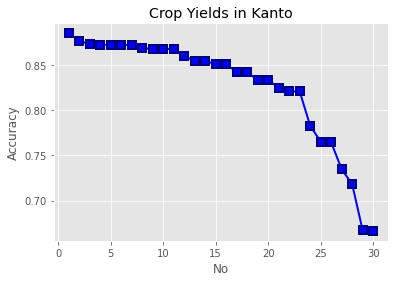

<Figure size 1296x864 with 0 Axes>

In [15]:
plt.plot(comparasion_results['No'], comparasion_results['Accuracy'], marker='s', c='b', ls='-', lw=2, ms=8, mew=2, mec='navy')
#plt.plot(years, oranges, marker='o', c='r', ls='--', lw=3, ms=10, alpha=.5)

plt.xlabel('No')
plt.ylabel('Accuracy')

plt.title("Crop Yields in Kanto")
#plt.legend(['Apples', 'Oranges']);
plt.figure(figsize=(18, 12))

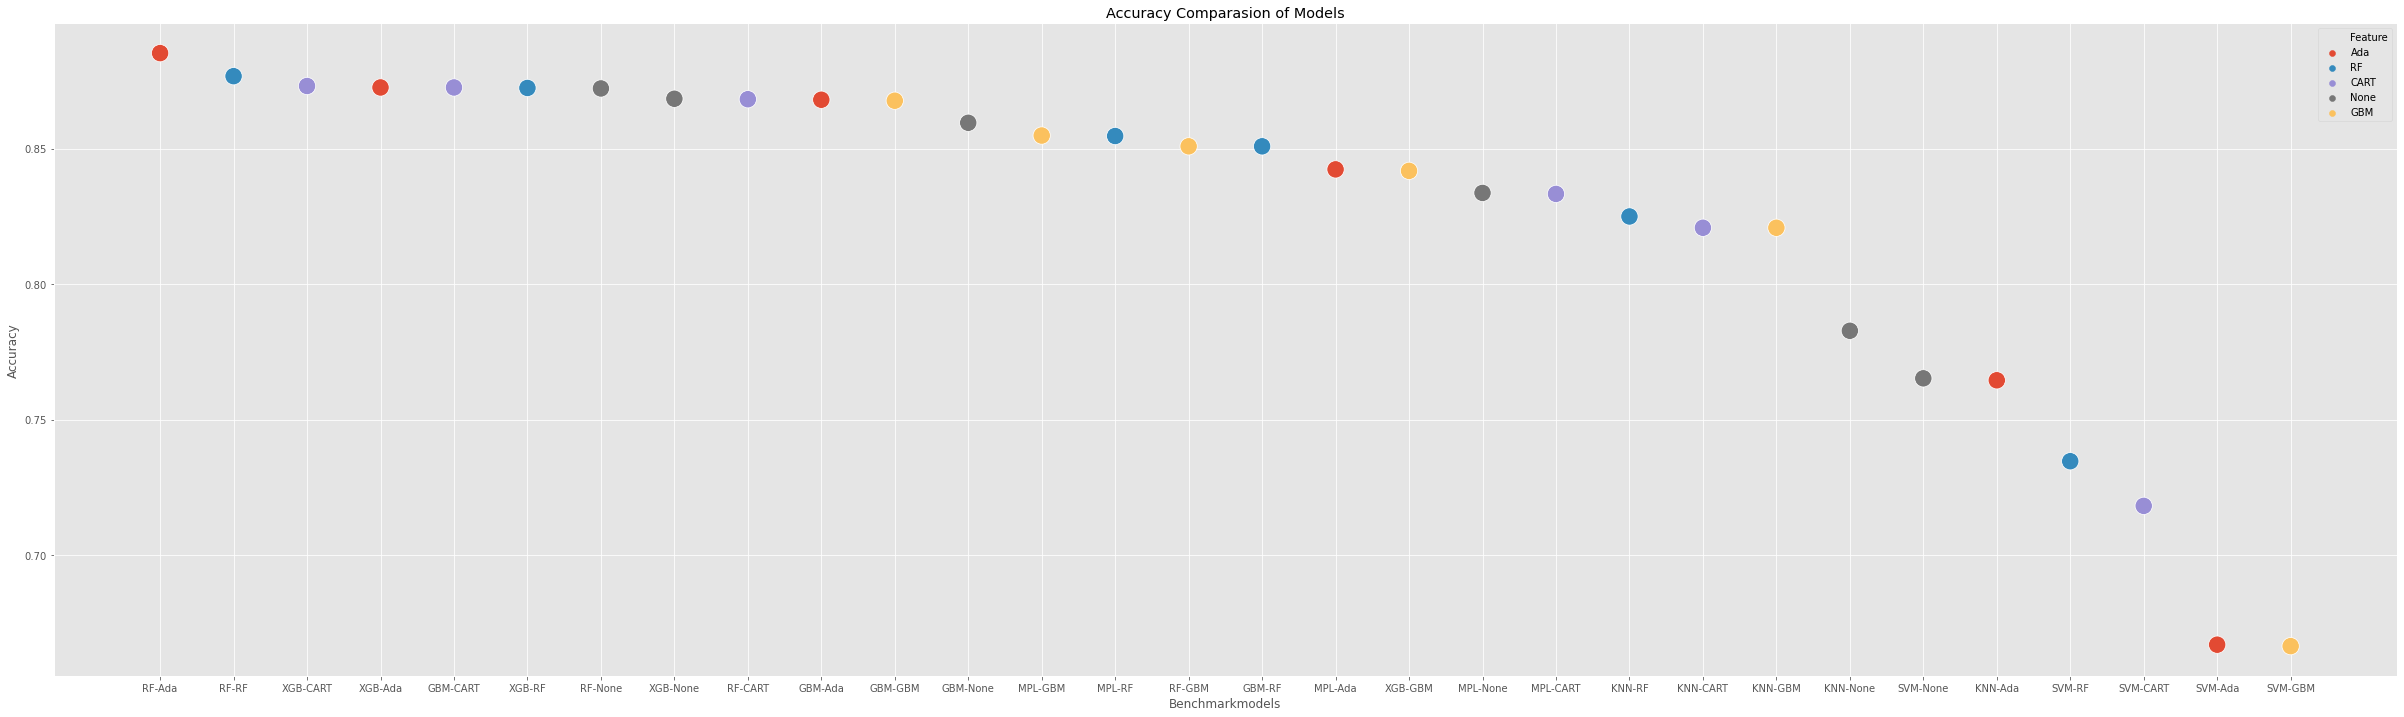

In [21]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

plt.figure(figsize=(42, 12))
plt.title('Accuracy Comparasion of Models')

sns.scatterplot(data =comparasion_results,
                x=comparasion_results['Benchmarkmodels'], 
                y=comparasion_results['Accuracy'], 
                hue=comparasion_results['Feature'],
                #style='Classic_Model', size='Type',
                s=300);

'''# Two example plots
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

spacing = 0.5 # This can be your user specified spacing. 
minorLocator = MultipleLocator(spacing)

ax1.yaxis.set_minor_locator(minorLocator)
ax1.xaxis.set_minor_locator(minorLocator)

# Set grid to use minor tick locations. 
ax1.grid(which = 'minor')

spacing = 1
minorLocator = MultipleLocator(spacing)

# Set minor tick locations.
ax2.yaxis.set_minor_locator(minorLocator)
ax2.xaxis.set_minor_locator(minorLocator)

# Set grid to use minor tick locations. 
ax2.grid(which = 'minor')
'''
plt.grid(True)

plt.show()

In [ ]:
import matplotlib.pyplot as plt

data = [24, 24, 24, 16, 16, 2, 2, 2]
x = list(range(0, len(data)))
y = list(range(0, 25))

plt.scatter(x, data, marker='s', c='b', s=50)
plt.yticks(y)
plt.xticks(x)

plt.grid(True)
plt.show()

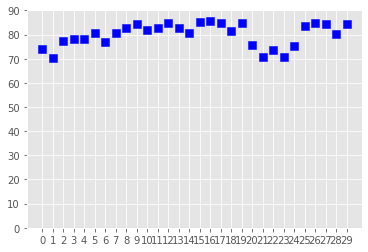

In [68]:
import matplotlib.pyplot as plt

data = comparasion_results['F-1 Score']*100
x = list(range(0, len(data)))
y = list(range(0, 100,10))

plt.scatter(x, data, marker='s', c='b', s=50)
plt.yticks(y)
plt.xticks(x)

plt.grid(True)
plt.show()

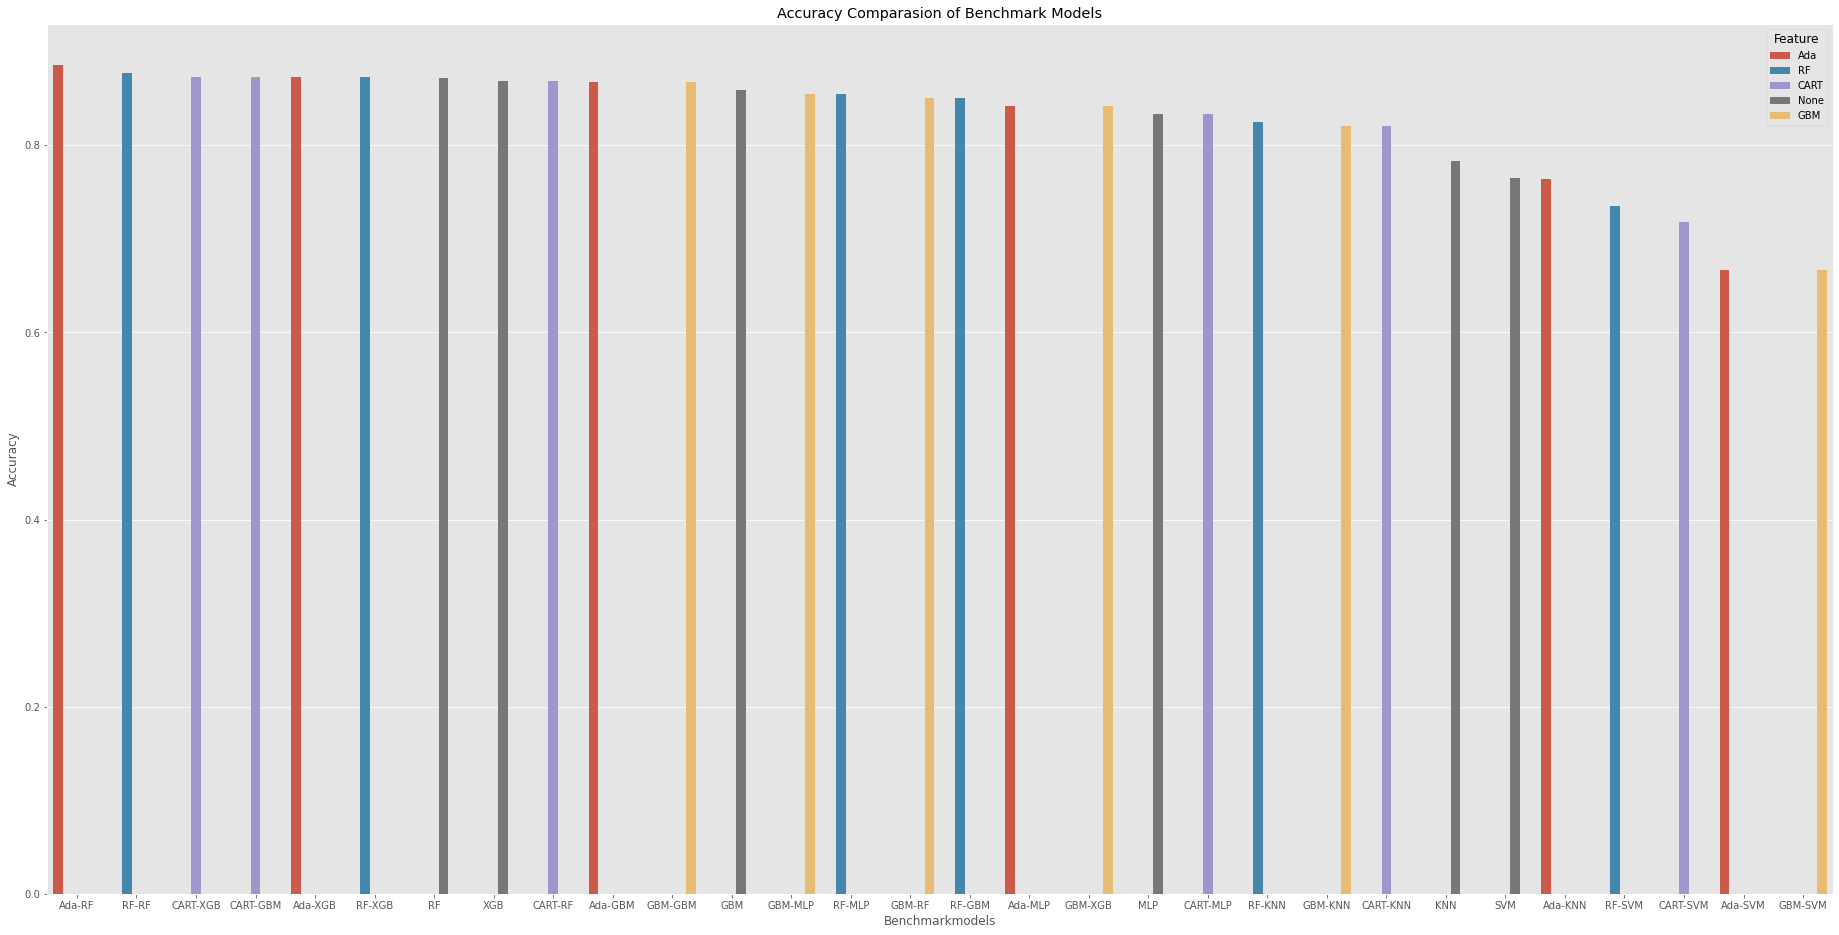

In [164]:
plt.figure(figsize=(32, 16))
plt.title('Accuracy Comparasion of Benchmark Models')
sns.barplot(x=comparasion_results['Benchmarkmodels'], 
                y=comparasion_results['Accuracy'], 
                hue=comparasion_results['Feature'],
            data = comparasion_results
           )

In [98]:
comparasion_results.columns

Index(['No', 'Benchmarkmodels', 'Type', 'Accuracy', 'F-1 Score', 'Precision',
       'Recall', 'Classic_Model', 'Feature', 'Accuracy_100'],
      dtype='object')

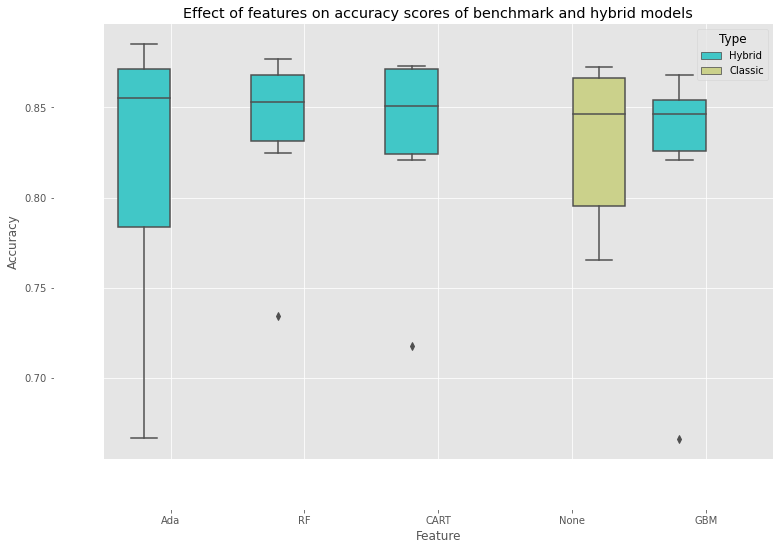

In [34]:
import seaborn as sns
#sns.set_theme(style="ticks", palette="pastel")

plt.figure(figsize=(12, 8))
plt.title('Effect of features on accuracy scores of benchmark and hybrid models')

# Load the example tips dataset
tips = comparasion_results

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Feature", y="Accuracy",
            hue="Type", palette="rainbow",
            data=tips)
sns.despine(offset=50, trim=True)

plt.grid(True)
plt.show()

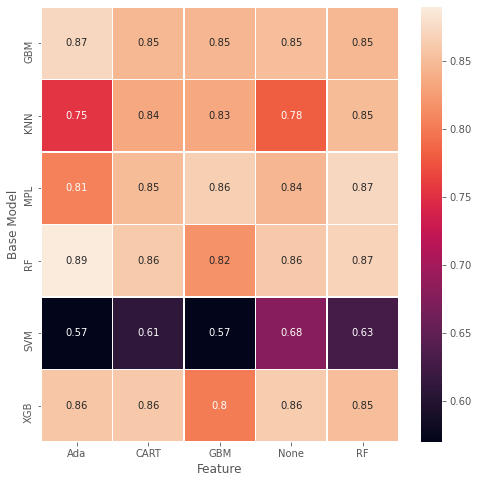

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_theme()

# Load the example flights dataset and convert to long-form
flights_long = comparasion_results
flights = (
    flights_long
    .pivot(index="Base Model", columns="Feature", values="Precision")
)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(flights, annot=True,  linewidths=.5, ax=ax)

In [ ]:
import seaborn as sns

df = comparasion_results
sns.displot(
    df, x="Accuracy", col="species", row="Feature",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

In [ ]:
g = sns.FacetGrid(comparasion_results, col="Classic_Model",  row="Accuracy")
g = g.map(plt.hist, "Feature")

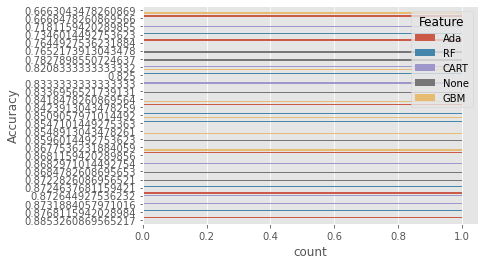

In [26]:
# importing the required library
 
import seaborn as sns
import matplotlib.pyplot as plt
 
# read a tips.csv file from seaborn library
df =comparasion_results
 
# count plot along y axis
sns.countplot(y ='Accuracy', hue = "Feature", data = df)
 
# Show the plot
plt.show()

In [27]:
comparasion_results

,No,Benchmarkmodels,Type,Accuracy,F-1 Score,Precision,Recall,Base Model,Feature
0,1,RF-Ada,Hybrid,0.885326,0.854600,0.889697,0.845556,RF,Ada
1,2,RF-RF,Hybrid,0.876812,0.846930,0.869038,0.824444,RF,RF
2,3,XGB-CART,Hybrid,0.873188,0.845369,0.860227,0.840000,XGB,CART
3,4,XGB-Ada,Hybrid,0.872645,0.846501,0.857323,0.847778,XGB,Ada
4,5,GBM-CART,Hybrid,0.872645,0.847155,0.846623,0.848889,GBM,CART
5,6,XGB-RF,Hybrid,0.872464,0.843319,0.851742,0.845556,XGB,RF
6,7,RF-None,Classic,0.872283,0.851147,0.860054,0.834444,RF,None
7,8,XGB-None,Classic,0.868478,0.834189,0.862424,0.824444,XGB,None
8,9,RF-CART,Hybrid,0.868297,0.849141,0.862121,0.858889,RF,CART
9,10,GBM-Ada,Hybrid,0.868116,0.828880,0.873095,0.805556,GBM,Ada
